In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv("Data/moore.csv", header=None).values

In [14]:
df[:10]

array([[1971, 2300],
       [1972, 3500],
       [1973, 2500],
       [1973, 2500],
       [1974, 4100],
       [1974, 4500],
       [1974, 8000],
       [1975, 3510],
       [1976, 5000],
       [1976, 8500]], dtype=int64)

In [23]:
X = df[:, 0].reshape((-1, 1))
Y = df[:, 1].reshape((-1, 1))

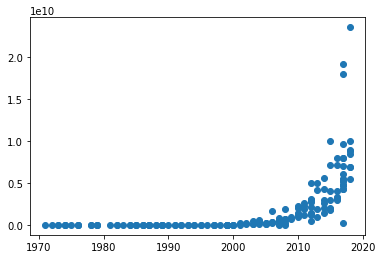

In [25]:
plt.scatter(X, Y)

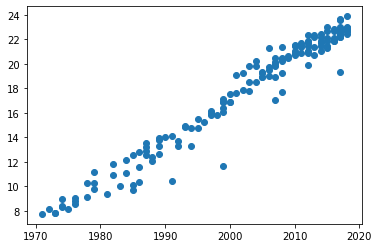

In [27]:
Y = np.log(Y)
plt.scatter(X, Y)

In [44]:
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()

In [46]:
X = (X - mx) / sx
Y = (Y - my) / sy

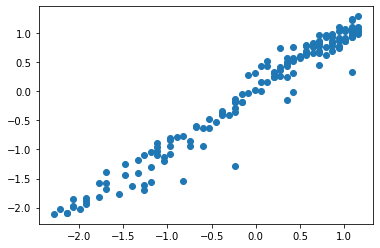

In [47]:
plt.scatter(X, Y)

In [48]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [76]:
model = nn.Linear(1, 1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01, momentum=0.7)

In [77]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [78]:
n_epochs = 100
losses = []

for epoch in range(100):
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    losses.append(loss.item())
    
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {epoch + 1}/{n_epochs}: loss: {loss.item():.4f}")

Epoch 1/100: loss: 0.0776
Epoch 2/100: loss: 0.0761
Epoch 3/100: loss: 0.0735
Epoch 4/100: loss: 0.0705
Epoch 5/100: loss: 0.0672
Epoch 6/100: loss: 0.0639
Epoch 7/100: loss: 0.0607
Epoch 8/100: loss: 0.0578
Epoch 9/100: loss: 0.0552
Epoch 10/100: loss: 0.0528
Epoch 11/100: loss: 0.0507
Epoch 12/100: loss: 0.0489
Epoch 13/100: loss: 0.0473
Epoch 14/100: loss: 0.0460
Epoch 15/100: loss: 0.0448
Epoch 16/100: loss: 0.0438
Epoch 17/100: loss: 0.0430
Epoch 18/100: loss: 0.0423
Epoch 19/100: loss: 0.0417
Epoch 20/100: loss: 0.0412
Epoch 21/100: loss: 0.0407
Epoch 22/100: loss: 0.0404
Epoch 23/100: loss: 0.0401
Epoch 24/100: loss: 0.0398
Epoch 25/100: loss: 0.0396
Epoch 26/100: loss: 0.0394
Epoch 27/100: loss: 0.0393
Epoch 28/100: loss: 0.0391
Epoch 29/100: loss: 0.0390
Epoch 30/100: loss: 0.0389
Epoch 31/100: loss: 0.0389
Epoch 32/100: loss: 0.0388
Epoch 33/100: loss: 0.0388
Epoch 34/100: loss: 0.0387
Epoch 35/100: loss: 0.0387
Epoch 36/100: loss: 0.0386
Epoch 37/100: loss: 0.0386
Epoch 38/1

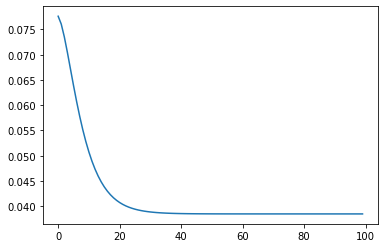

In [79]:
plt.plot(losses)

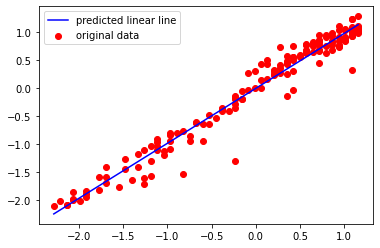

In [84]:
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.scatter(X, Y, color="red", label="original data")
plt.plot(X, predicted, color="blue", label="predicted linear line")
plt.legend()
plt.show()

In [91]:
w = model.weight.detach().numpy()[0, 0]

In [92]:
w

0.98055834

In [96]:
# The intercept after transformation is: 
a = w * sy / sx

In [97]:
a

0.3416780316201537

In [98]:
np.exp(a)

1.4073071161708464

In [99]:
print(f"Time to double: {np.log(2) / a}")

Time to double: 2.028655975548708


## Unnormalized version

In [169]:
X = df[:, 0]
Y = df[:, 1]

In [170]:
X = X.reshape((-1, 1))
Y = Y.reshape((-1, 1))

In [171]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [172]:
X = np.log(X)
Y = np.log(Y)

In [173]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [174]:
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01, momentum=0.7)

In [175]:
n_epochs = 100
losses = []

for epoch in range(n_epochs):
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    losses.append(loss.item())
    
    loss.backward()
    optimizer.step
        
    print(f"Epoch {epoch + 1}/{n_epochs}: Loss: {loss.item():.4f}")

Epoch 1/100: Loss: 354.7671
Epoch 2/100: Loss: 354.7671
Epoch 3/100: Loss: 354.7671
Epoch 4/100: Loss: 354.7671
Epoch 5/100: Loss: 354.7671
Epoch 6/100: Loss: 354.7671
Epoch 7/100: Loss: 354.7671
Epoch 8/100: Loss: 354.7671
Epoch 9/100: Loss: 354.7671
Epoch 10/100: Loss: 354.7671
Epoch 11/100: Loss: 354.7671
Epoch 12/100: Loss: 354.7671
Epoch 13/100: Loss: 354.7671
Epoch 14/100: Loss: 354.7671
Epoch 15/100: Loss: 354.7671
Epoch 16/100: Loss: 354.7671
Epoch 17/100: Loss: 354.7671
Epoch 18/100: Loss: 354.7671
Epoch 19/100: Loss: 354.7671
Epoch 20/100: Loss: 354.7671
Epoch 21/100: Loss: 354.7671
Epoch 22/100: Loss: 354.7671
Epoch 23/100: Loss: 354.7671
Epoch 24/100: Loss: 354.7671
Epoch 25/100: Loss: 354.7671
Epoch 26/100: Loss: 354.7671
Epoch 27/100: Loss: 354.7671
Epoch 28/100: Loss: 354.7671
Epoch 29/100: Loss: 354.7671
Epoch 30/100: Loss: 354.7671
Epoch 31/100: Loss: 354.7671
Epoch 32/100: Loss: 354.7671
Epoch 33/100: Loss: 354.7671
Epoch 34/100: Loss: 354.7671
Epoch 35/100: Loss: 354

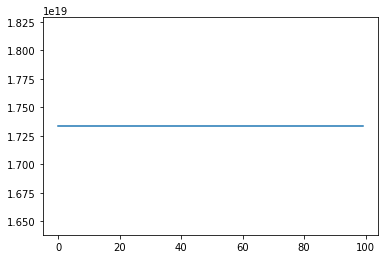

In [122]:
plt.plot(losses)